In [6]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import scipy.optimize as opt
import scipy.fft
from scipy.special import factorial
import math
# import csv
from matplotlib import rc, rcParams

In [7]:
plt.rcParams['figure.figsize'] = [5, 5]
plt.rcParams['figure.autolayout'] = True  # Ensures proper spacing
# Set equal aspect ratio and axis limits in the plotting code instead of rcParams

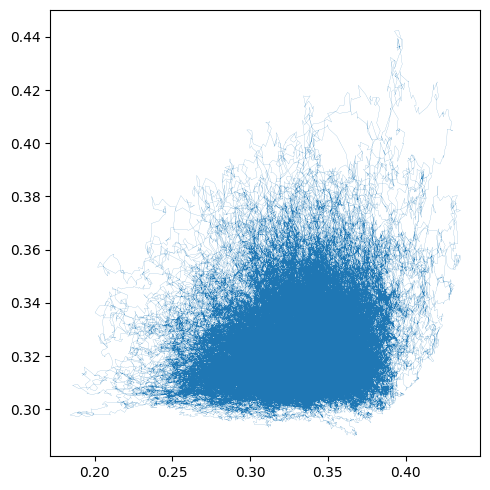

0.33075684455500104 0.3230002390299779


In [8]:
# with open('data/exp_list_0.csv', mode ='r') as file: # "ElsieWiddowsonFileC051.txt"
#     lines = file.readlines()
#     lines = [[float(i) for i in line.split(",")] for line in lines]

with open('data/Real/293_2/293-2mA_20k_10s_3u_10-29_2.txt', mode ='r') as file: # "ElsieWiddowsonFileC051.txt"
    lines = file.readlines()
    lines = [[float(i) for i in line.split("\t")] for line in lines]

# print(lines)

lines = np.array(lines)
plt.plot(lines[:,0], lines[:,1], lw=0.1)
plt.show()


avgx = sum(lines[:,0] / len(lines))
avgy = sum(lines[:,1] / len(lines))

print(avgx, avgy)


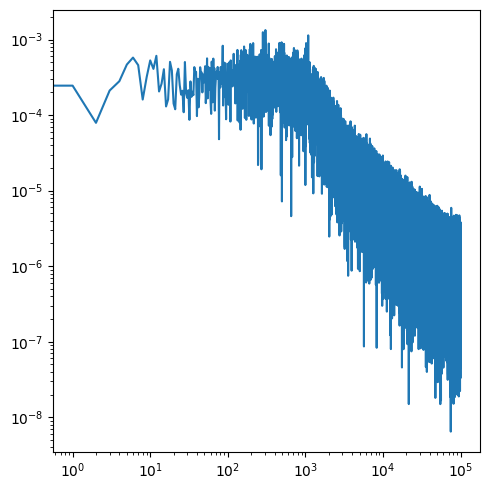

In [9]:
dists = np.sqrt((lines[:,0] - avgx) ** 2 + (lines[:,1] - avgy) ** 2)
freqs = scipy.fft.fft(dists) / len(dists)
plt.loglog(abs(freqs[100:10**5]))

In [15]:
import os
import glob

# Get all txt files in xyscan directory, excluding Settings files
currents = [100, 142, 193, 292, 392, 493]  # List of currents to process, 
xyscan_files = []
for current in currents:
    xyscan_files.extend([f for f in glob.glob(f'data/Real/xyscan/{current}-*.txt')
                        if not (f.endswith('Settingsx.txt') or f.endswith('Settingsy.txt') or 
                               f.endswith('SettingsX.txt') or f.endswith('SettingsY.txt'))])

all_data = []
for filename in xyscan_files:
    with open(filename, mode='r') as file:
        lines = file.readlines()
        # Convert each line into list of floats by splitting on tabs
        data = [[float(val) for val in line.strip().split('\t')] for line in lines]
        # Transpose to get columns 
        data = list(map(list, zip(*data)))

    print(f"Processing {filename}:")
    all_data += [data]
    # print(data)

    # plt.figure()
    # plt.plot(np.arange(len(data[0])), data[0], label = 'x data')  # First two columns are x,y coordinates
    # plt.plot(np.arange(len(data[1])), data[1], label = 'y data')  # First two columns are x,y coordinates
    # plt.plot(np.arange(len(data[2])), data[2], label = 'x data strain')  # First two columns are x,y coordinates
    # plt.plot(np.arange(len(data[3])), data[3], label = 'y data strain')
    # plt.title(os.path.basename(filename))
    # plt.legend()
    # plt.show()

all_data = np.array(all_data)


Processing data/Real/xyscan/100-6mA_xx.txt:
Processing data/Real/xyscan/100-6mA_yy.txt:
Processing data/Real/xyscan/142-4mA_yy.txt:
Processing data/Real/xyscan/142-4mA_xx.txt:
Processing data/Real/xyscan/193-5mA_xx.txt:
Processing data/Real/xyscan/193-4mA_yy.txt:
Processing data/Real/xyscan/292-1mA_yy.txt:
Processing data/Real/xyscan/292-1mA_xx.txt:
Processing data/Real/xyscan/392-9mA_yy.txt:
Processing data/Real/xyscan/392-8mA_XX.txt:
Processing data/Real/xyscan/493-3mA_xx.txt:


In [16]:
# Need to now find the part of the peaks where we fit a line for calibrating the QPD.
print(len(xyscan_files), len(all_data))

11 11


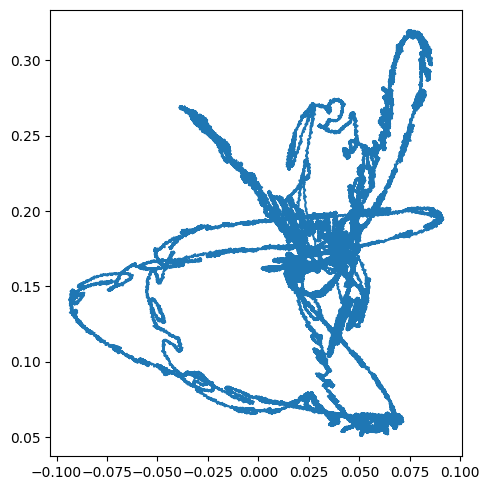

In [17]:
plt.plot(all_data[0][0])